# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`
$$\nabla Q(w) = 2X^T(Xw - y)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [101]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [103]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [104]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full','stochastic', 'momentum','adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [105]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:

124547901, https://contest.yandex.ru/contest/70588/run-report/124547901/
* **StochasticDescent**:
124550937, https://contest.yandex.ru/contest/70588/run-report/124550937/


* **MomentumDescent**:
124552983, https://contest.yandex.ru/contest/70588/run-report/124552983/
* **Adam**:124554852, https://contest.yandex.ru/contest/70588/run-report/124554852/

* **LinearRegression**:124560360, https://contest.yandex.ru/contest/70588/run-report/124560360/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [106]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [107]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [108]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [109]:
data.dtypes

,0
brand,object
model,object
vehicleType,object
gearbox,object
fuelType,object
notRepairedDamage,object
powerPS,int64
kilometer,int64
autoAgeMonths,int64
price,int64


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

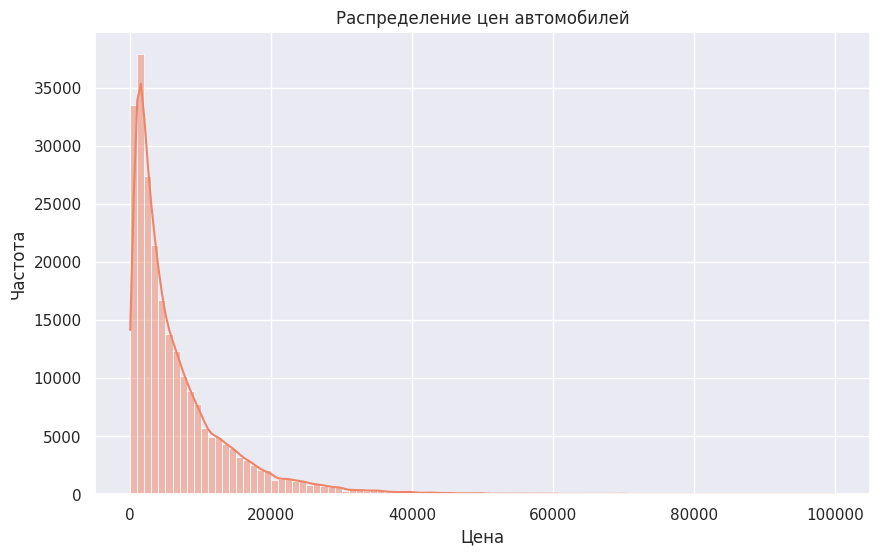

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=100, kde=True, color=plt.cm.coolwarm(0.8))
plt.title('Распределение цен автомобилей')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

Можно посмотреть на логарифм цены, так как у нас слишком длинный хвост справа

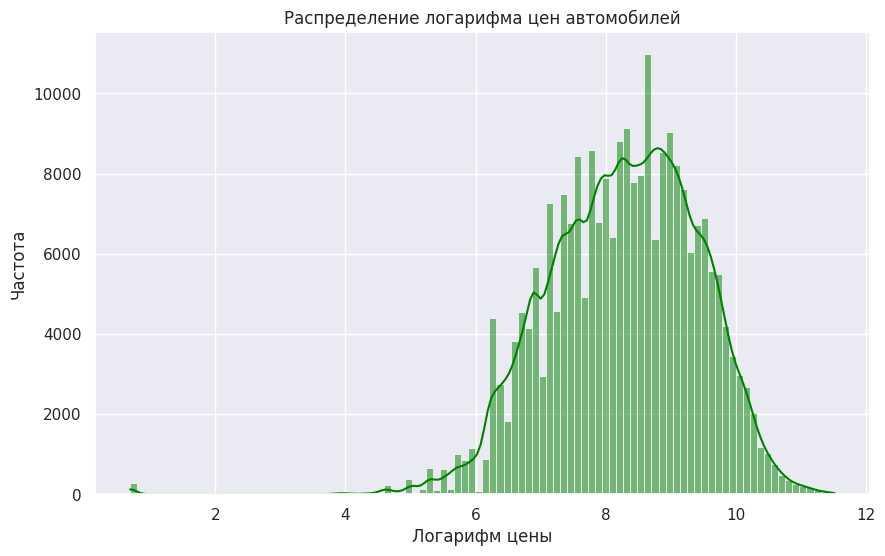

In [111]:
data['log_price'] = np.log1p(data['price'])
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=100, kde=True, color='green')
plt.title('Распределение логарифма цен автомобилей')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.show()

Теперь больше хвост слева, не особотоже похоже на нормальное распределение, можно будут продолжить работать и без логарифма(уберем выбросы справа)

Убираем выбросы. Пусть машина стоит больше 50 и меньше, чем 99 процентный перцентиль, в целом выбросов особо нет, так как бывают очень дорогие машины, но их очень мало( но мы убради какое-то их количесво).

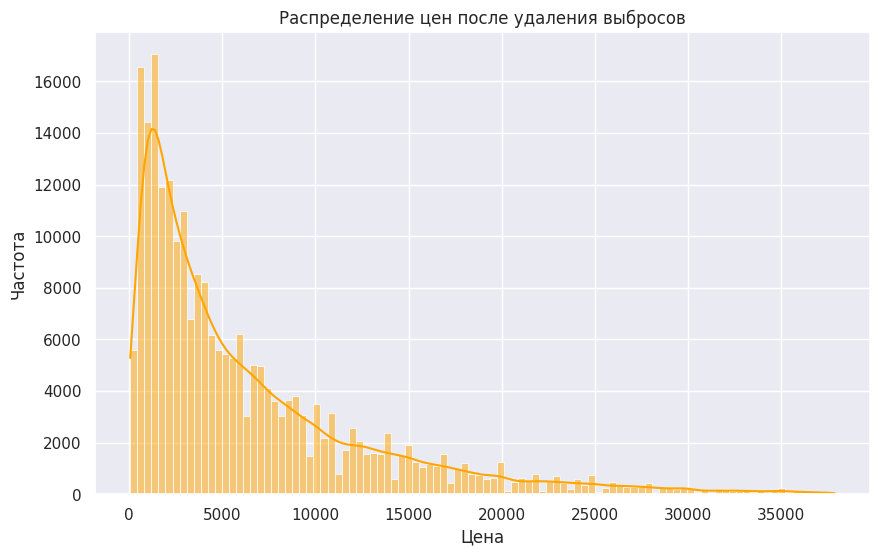

In [112]:
data = data[(data['price'] >= 50) & (data['price'] <= data['price'].quantile(0.99))]
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=100, kde=True, color='orange')
plt.title('Распределение цен после удаления выбросов')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

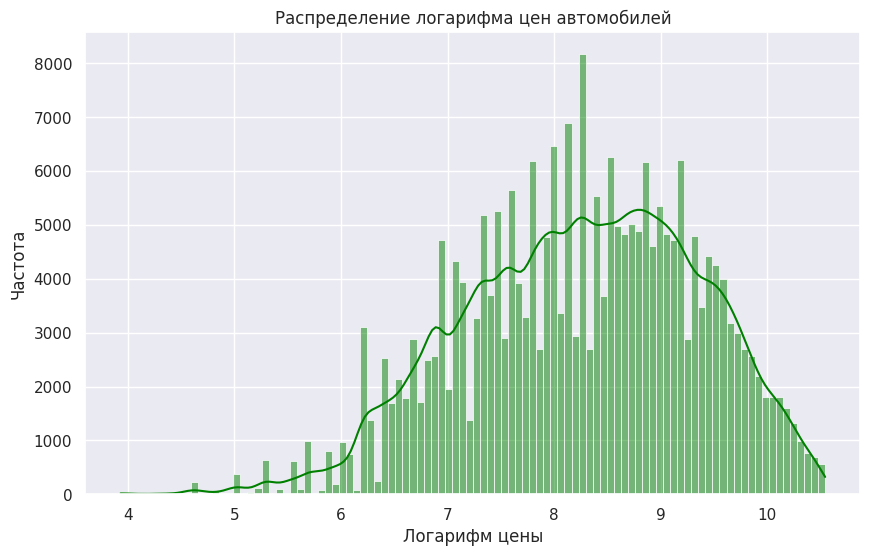

In [113]:
data['log_price'] = np.log1p(data['price'])
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=100, kde=True, color='green')
plt.title('Распределение логарифма цен автомобилей')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.show()

Логрифм цены тоже выглядит лучше

Теперь будем смотреть признаки

powerPS - мощность автомобиля в PS (метрическая лошадиная сила) - вещественный

<ipython-input-114-aa4b5f39aa54>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_by_power = data.groupby('power_bin')['price'].mean()


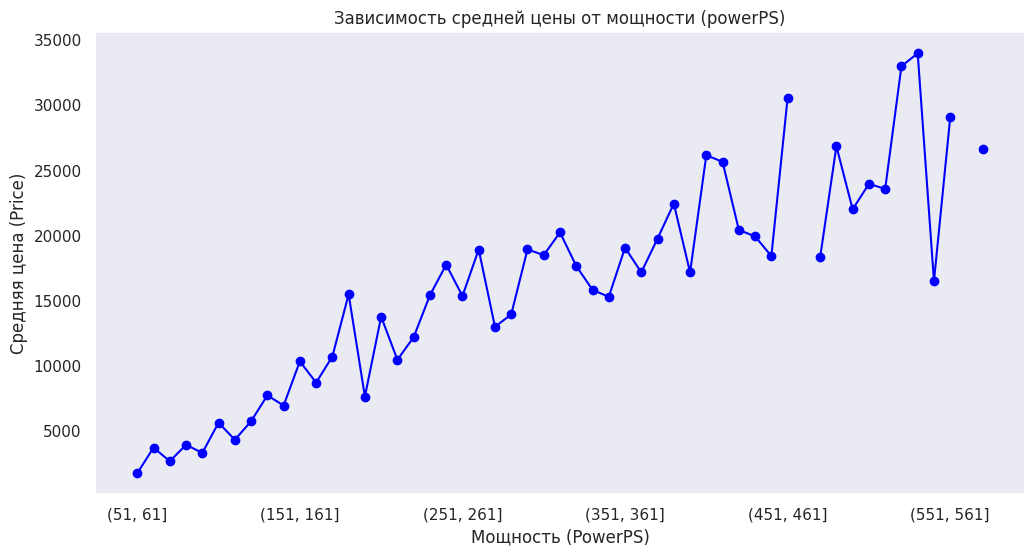

In [114]:
power_bins = np.arange(data['powerPS'].min(), data['powerPS'].max(), 10)
data['power_bin'] = pd.cut(data['powerPS'], bins=power_bins)
mean_price_by_power = data.groupby('power_bin')['price'].mean()
plt.figure(figsize=(12, 6))
mean_price_by_power.plot(kind='line', color='blue', marker='o')
plt.title('Зависимость средней цены от мощности (powerPS)')
plt.xlabel('Мощность (PowerPS)')
plt.ylabel('Средняя цена (Price)')
plt.grid()
plt.show()

In [115]:
correlation = data[['price', 'powerPS']].corr()
print("Корреляция между ценой и мощностью (powerPS):")
print(correlation)



Корреляция между ценой и мощностью (powerPS):
            price   powerPS
price    1.000000  0.561192
powerPS  0.561192  1.000000


Определенно заметна положительная зависимость, оставим этот признак, потом отмасштабируем с помощью StandardScaler

Осталось только убрать выбросы

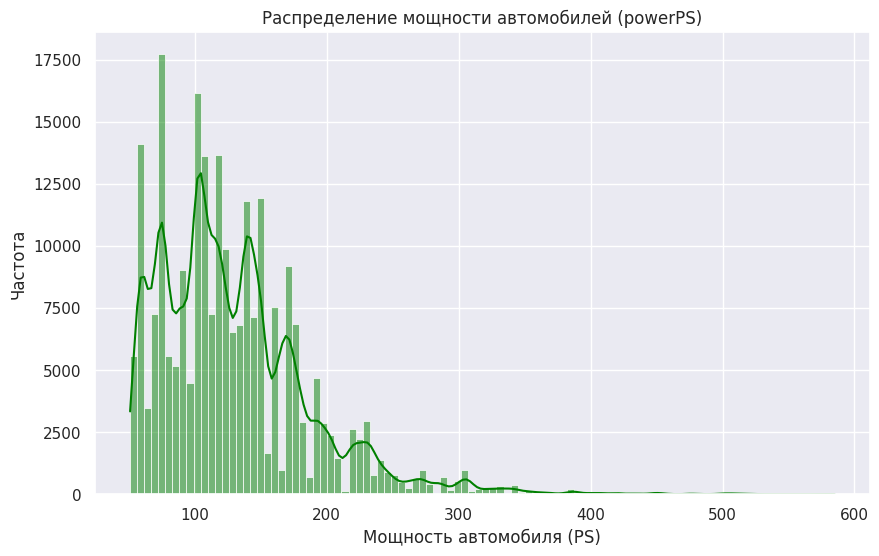

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(data['powerPS'], bins=100, kde=True, color='green')
plt.title('Распределение мощности автомобилей (powerPS)')
plt.xlabel('Мощность автомобиля (PS)')
plt.ylabel('Частота')
plt.show()

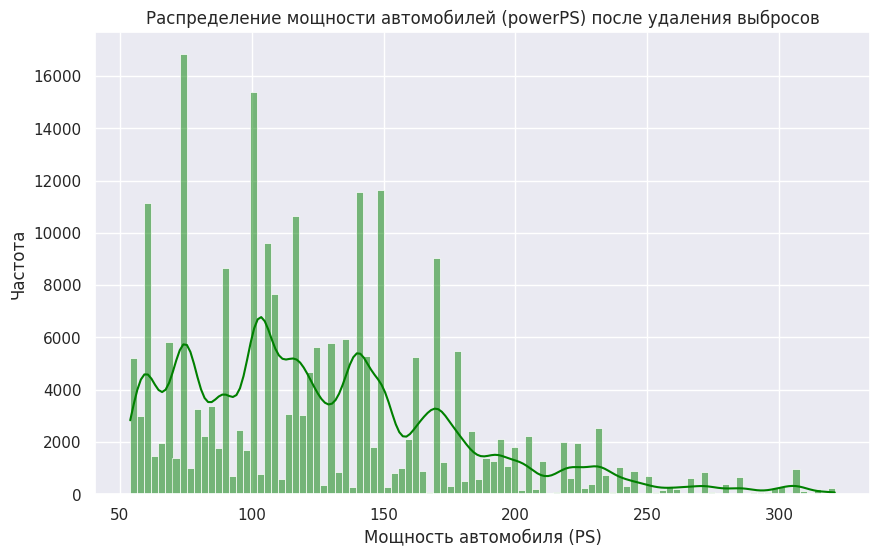

In [117]:
data = data[(data['powerPS'] >= data['powerPS'].quantile(0.01)) & (data['powerPS'] <= data['powerPS'].quantile(0.99))]

plt.figure(figsize=(10, 6))
sns.histplot(data['powerPS'], bins=100, kde=True, color='green')
plt.title('Распределение мощности автомобилей (powerPS) после удаления выбросов')
plt.xlabel('Мощность автомобиля (PS)')
plt.ylabel('Частота')
plt.show()

Второй вещественный признак: kilometer

<ipython-input-118-85e0199c690b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_by_power = data.groupby('power_bin')['price'].mean()


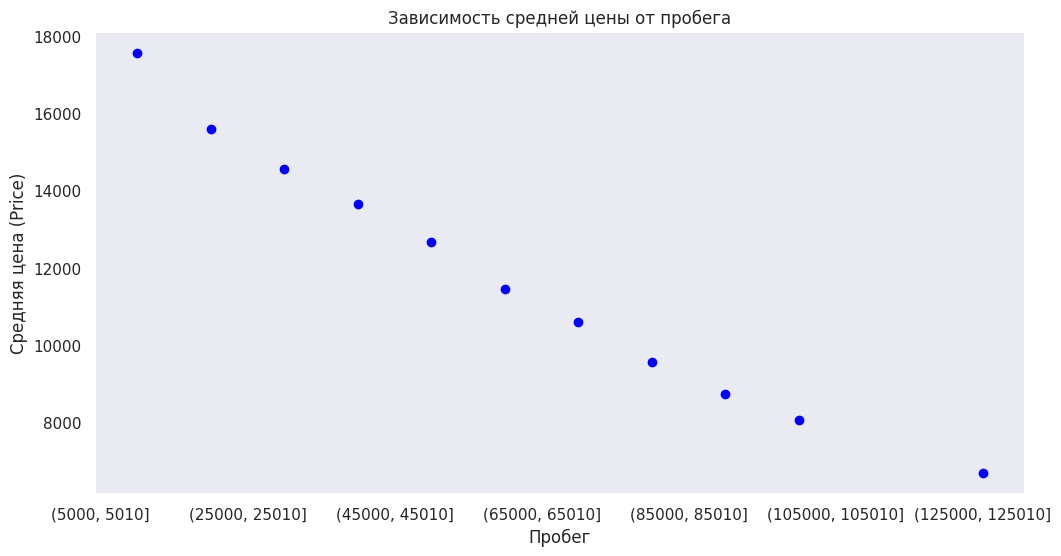

In [118]:
power_bins = np.arange(data['kilometer'].min(), data['kilometer'].max(), 10)
data['power_bin'] = pd.cut(data['kilometer'], bins=power_bins)
mean_price_by_power = data.groupby('power_bin')['price'].mean()
plt.figure(figsize=(12, 6))
mean_price_by_power.plot(kind='line', color='blue', marker='o')
plt.title('Зависимость средней цены от пробега')
plt.xlabel('Пробег')
plt.ylabel('Средняя цена (Price)')
plt.grid()
plt.show()

In [119]:
correlation = data[['price', 'kilometer']].corr()
print("Корреляция между ценой и пробегом:")
print(correlation)

Корреляция между ценой и пробегом:
              price  kilometer
price      1.000000  -0.487337
kilometer -0.487337   1.000000


Тоже сильно влияет признак, оставим его, только уберем выбросы

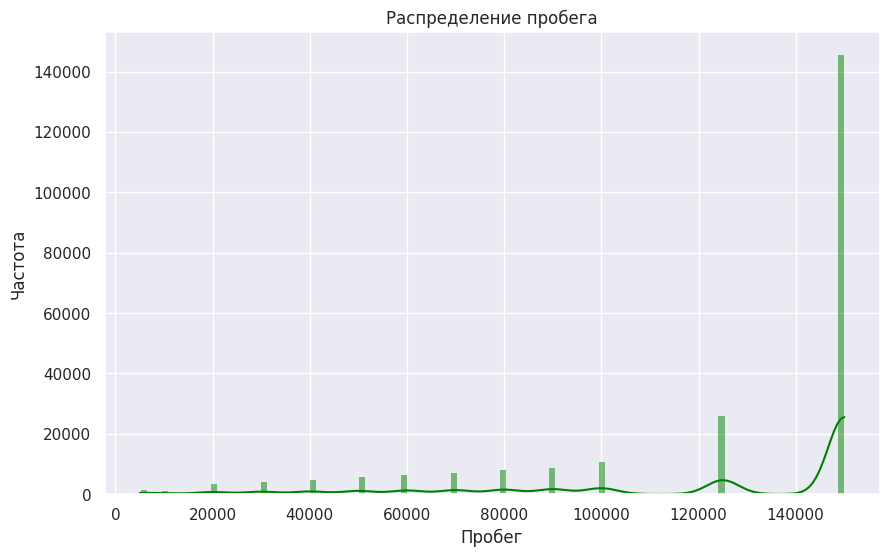

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(data['kilometer'], bins=100, kde=True, color='green')
plt.title('Распределение пробега')
plt.xlabel('Пробег')
plt.ylabel('Частота')
plt.show()

In [121]:
print("Уникальных значений в пробеге:", data['kilometer'].nunique())

Уникальных значений в пробеге: 13


Оказывается, это категориальный признак, тогда закодируем потом one-hot-кодированием

Следующий признак: autoAgeMonths

<ipython-input-122-70f0282fc3a5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_by_power = data.groupby('power_bin')['price'].mean()


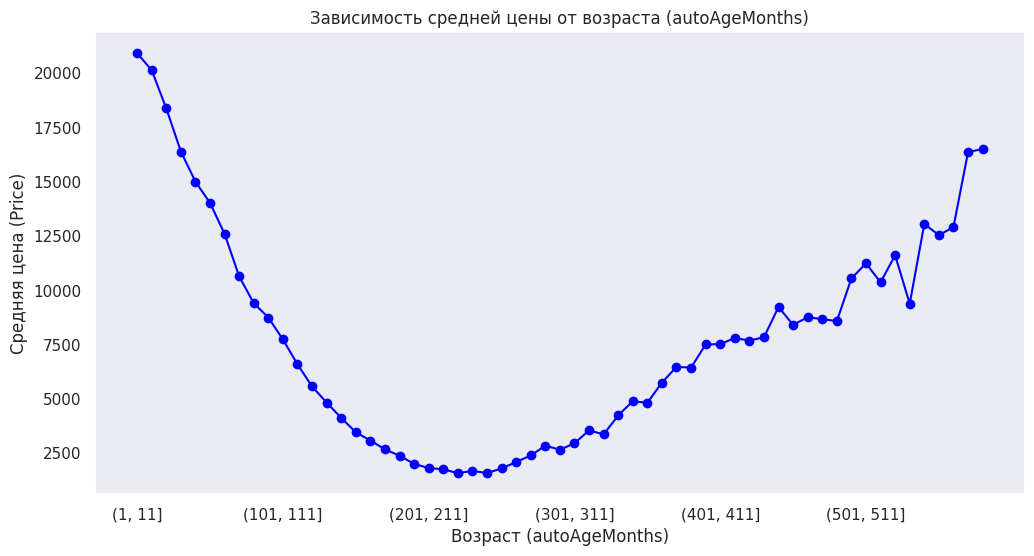

In [122]:
power_bins = np.arange(data['autoAgeMonths'].min(), data['autoAgeMonths'].max(), 10)
data['power_bin'] = pd.cut(data['autoAgeMonths'], bins=power_bins)
mean_price_by_power = data.groupby('power_bin')['price'].mean()
plt.figure(figsize=(12, 6))
mean_price_by_power.plot(kind='line', color='blue', marker='o')
plt.title('Зависимость средней цены от возраста (autoAgeMonths)')
plt.xlabel('Возраст (autoAgeMonths)')
plt.ylabel('Средняя цена (Price)')
plt.grid()
plt.show()

Видимо люди покупают раритетные машины

In [123]:
correlation = data[['price', 'autoAgeMonths']].corr()
print("Корреляция между ценой и возрастом:")
print(correlation)

Корреляция между ценой и возрастом:
                  price  autoAgeMonths
price          1.000000      -0.585195
autoAgeMonths -0.585195       1.000000


Из-за того, что зависит нелинейно, возьмем логарифм возраста

In [124]:
data['log_age'] = np.log(data['autoAgeMonths'] + 1)

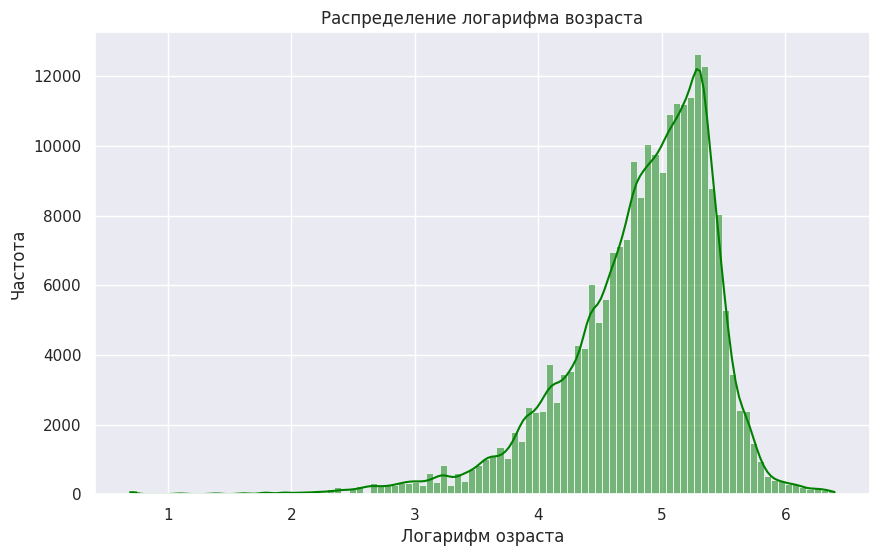

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(data['log_age'], bins=100, kde=True, color='green')
plt.title('Распределение логарифма возраста')
plt.xlabel('Логарифм озраста')
plt.ylabel('Частота')
plt.show()

Добавим этот признак к численным и потом отмасштабируем

Теперь биномиальные признаки

1. gearbox - тип трансмисcии

2. notRepairedDamage - есть ли в автомобиле неисправность, которая еще не устранена

In [126]:
print("Уникальных значений в типе трансмисии:", data['gearbox'].nunique())

Уникальных значений в типе трансмисии: 2


In [127]:
unique_values = data['gearbox'].unique()
print(unique_values)

['manuell' 'automatik']


In [128]:
print("Уникальных значений в notRepairedDamage:", data['notRepairedDamage'].nunique())

Уникальных значений в notRepairedDamage: 2


In [129]:
unique_values = data['notRepairedDamage'].unique()
print(unique_values)

['nein' 'ja']


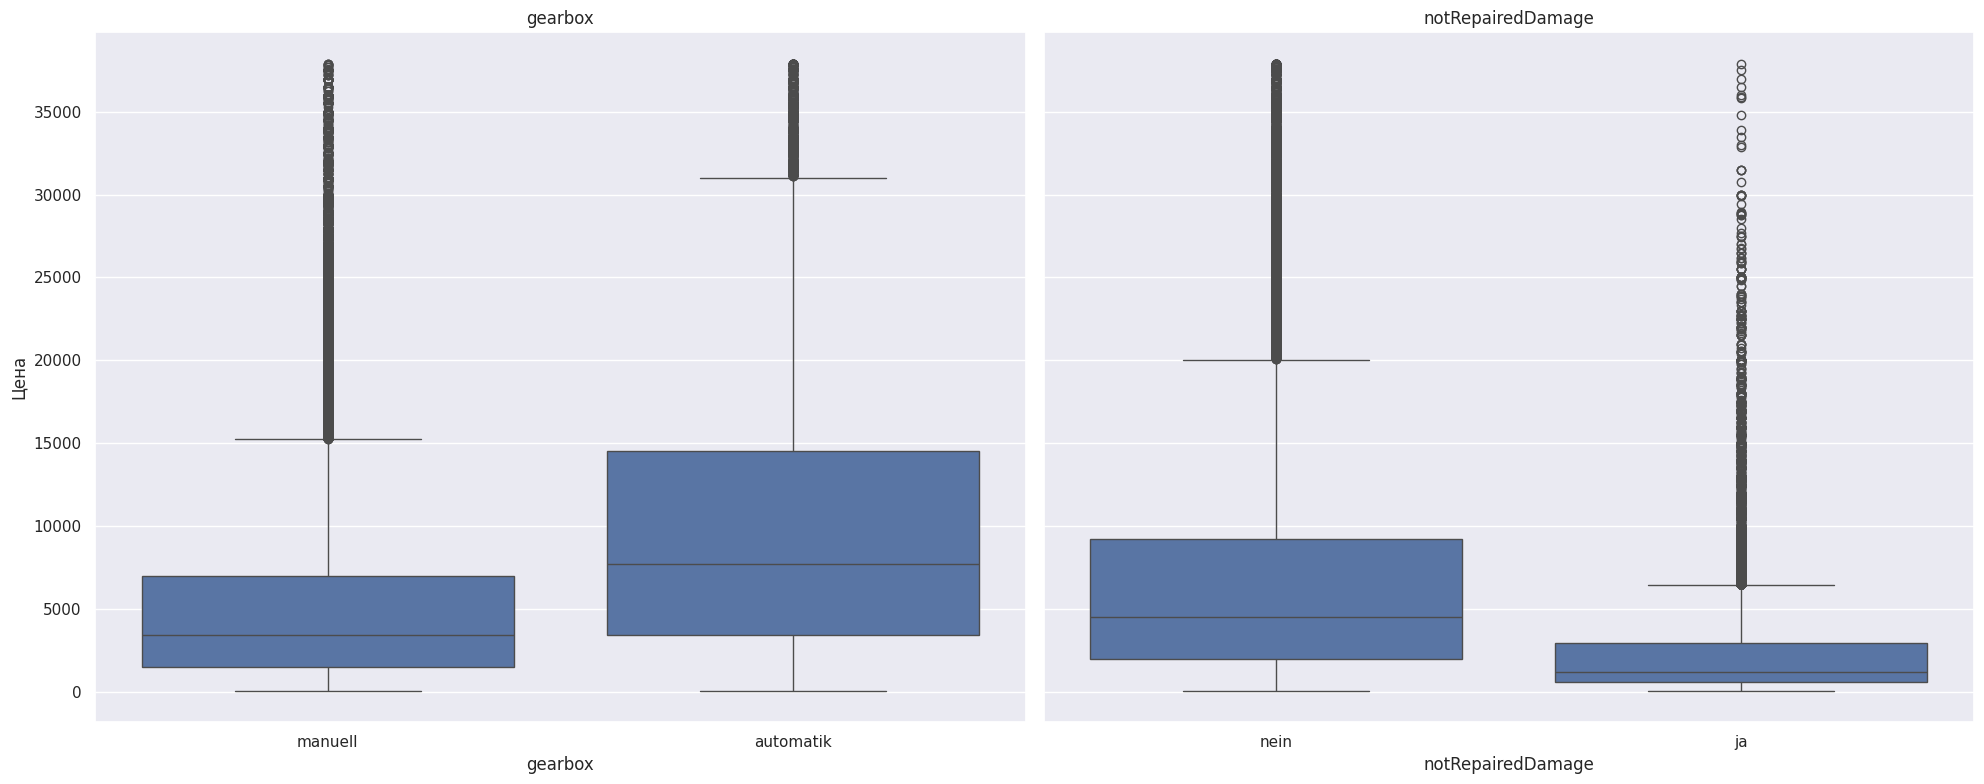

In [130]:
plt.rcParams['figure.figsize'] = (20, 8)

fig, axes = plt.subplots(1, 2, sharey=True)
columns = ['gearbox', 'notRepairedDamage']
titles = [
    'gearbox',
    'notRepairedDamage'


]
for ax, col, title in zip(axes, columns, titles):
    sns.boxplot(x=col, y="price", data=data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(col)
    if ax == axes[0]:
        ax.set_ylabel("Цена")

plt.tight_layout()
plt.show()

Признаки выглядят важными

In [131]:
data['gearbox'] = data['gearbox'].map({'manuell': 0, 'automatik': 1}).fillna(0)

In [132]:
data['notRepairedDamage'] = data['notRepairedDamage'].map({'nein': 0, 'ja': 1}).fillna(0)

In [133]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,power_bin,log_age
0,volkswagen,golf,kleinwagen,0,benzin,0,75,150000,177,1500,7.313887,"(171, 181]",5.181784
1,skoda,fabia,kleinwagen,0,diesel,0,69,90000,93,3600,8.188967,"(91, 101]",4.543295
2,bmw,3er,limousine,0,benzin,1,102,150000,246,650,6.478510,"(241, 251]",5.509388
3,peugeot,2_reihe,cabrio,0,benzin,0,109,150000,140,2200,7.696667,"(131, 141]",4.948760
4,mazda,3_reihe,limousine,0,benzin,0,105,150000,136,2000,7.601402,"(131, 141]",4.919981


Оставшиеся признаки:

brand - название бренда автомобиля

model - название модели автомобиля

vehicleType - тип транспортного средства

fuelType - какой вид топлива использует автомобиль

In [134]:
print("Уникальных значений в бренде:", data['brand'].nunique())

Уникальных значений в бренде: 38


Довольно много значений, посмотрим есть ли особая зависмость между брендом и ценой

In [135]:
data['brand_encoded'] = data['brand'].astype('category').cat.codes
correlation = data[['brand_encoded', 'price']].corr().iloc[0, 1]
print("Корреляция бренда с ценой:", correlation)


Корреляция бренда с ценой: -0.12060339491203276


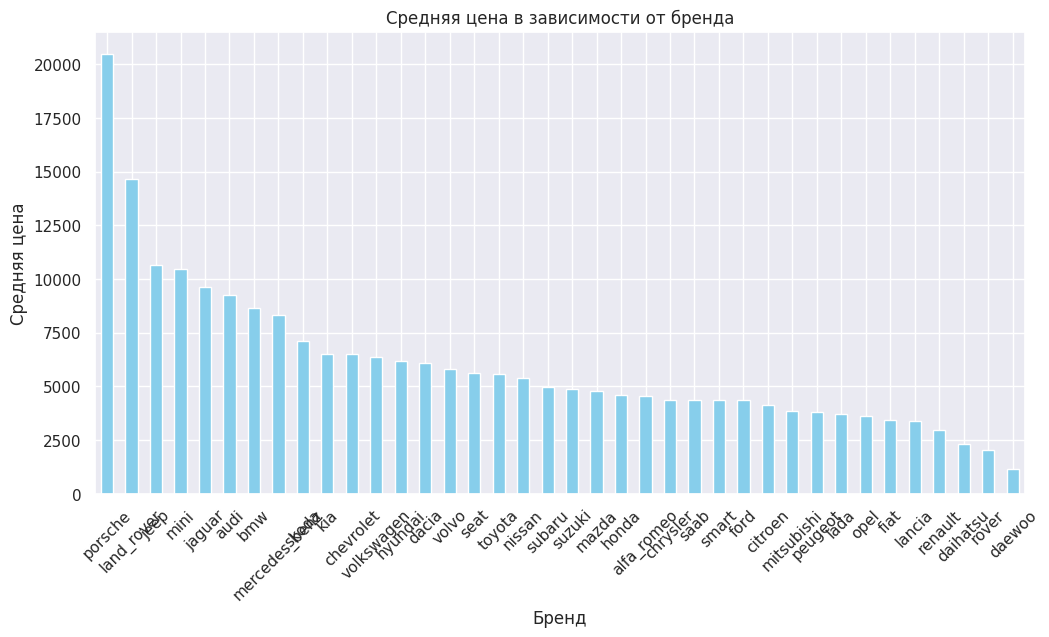

In [136]:
plt.figure(figsize=(12, 6))
avg_price_by_brand = data.groupby('brand')['price'].mean().sort_values(ascending=False)
avg_price_by_brand.plot(kind='bar', color='skyblue')
plt.title('Средняя цена в зависимости от бренда')
plt.ylabel('Средняя цена')
plt.xlabel('Бренд')
plt.xticks(rotation=45)
plt.show()


В целом какая-то связь есть, пока не будем удалять этот признак, но может удалим или объединим элементы котрые редко появляются

In [137]:
def fun_rare_categories(df, categorical_columns, x):
    rare_categories = {}

    for i in categorical_columns:

        freq = df[i].value_counts(normalize=True)
        rare = freq[freq < x].index.tolist()
        if rare:
            rare_categories[i] = rare

    return rare_categories


first = ['brand']
rare_categories = fun_rare_categories(data, first, 0.003)

print(rare_categories)

{'brand': ['dacia', 'jeep', 'land_rover', 'subaru', 'daihatsu', 'saab', 'jaguar', 'lancia', 'daewoo', 'rover', 'lada']}


Много брендов появляется редко, не будем их объединять, так как это может повлиять на модель

In [138]:
print("Уникальных значений в моделе:", data['model'].nunique())

Уникальных значений в моделе: 248


In [139]:
data['model_encoded'] = data['model'].astype('category').cat.codes
correlation = data[['model_encoded', 'price']].corr().iloc[0, 1]
print("Корреляция модели с ценой:", correlation)

Корреляция модели с ценой: 0.016439722302150277


Не будем использовать этот признак

In [140]:
print("Уникальных значений в типе транспорта:", data['vehicleType'].nunique())

Уникальных значений в типе транспорта: 8


In [141]:
print("Уникальных значений в типе топлива:", data['fuelType'].nunique())

Уникальных значений в типе топлива: 7


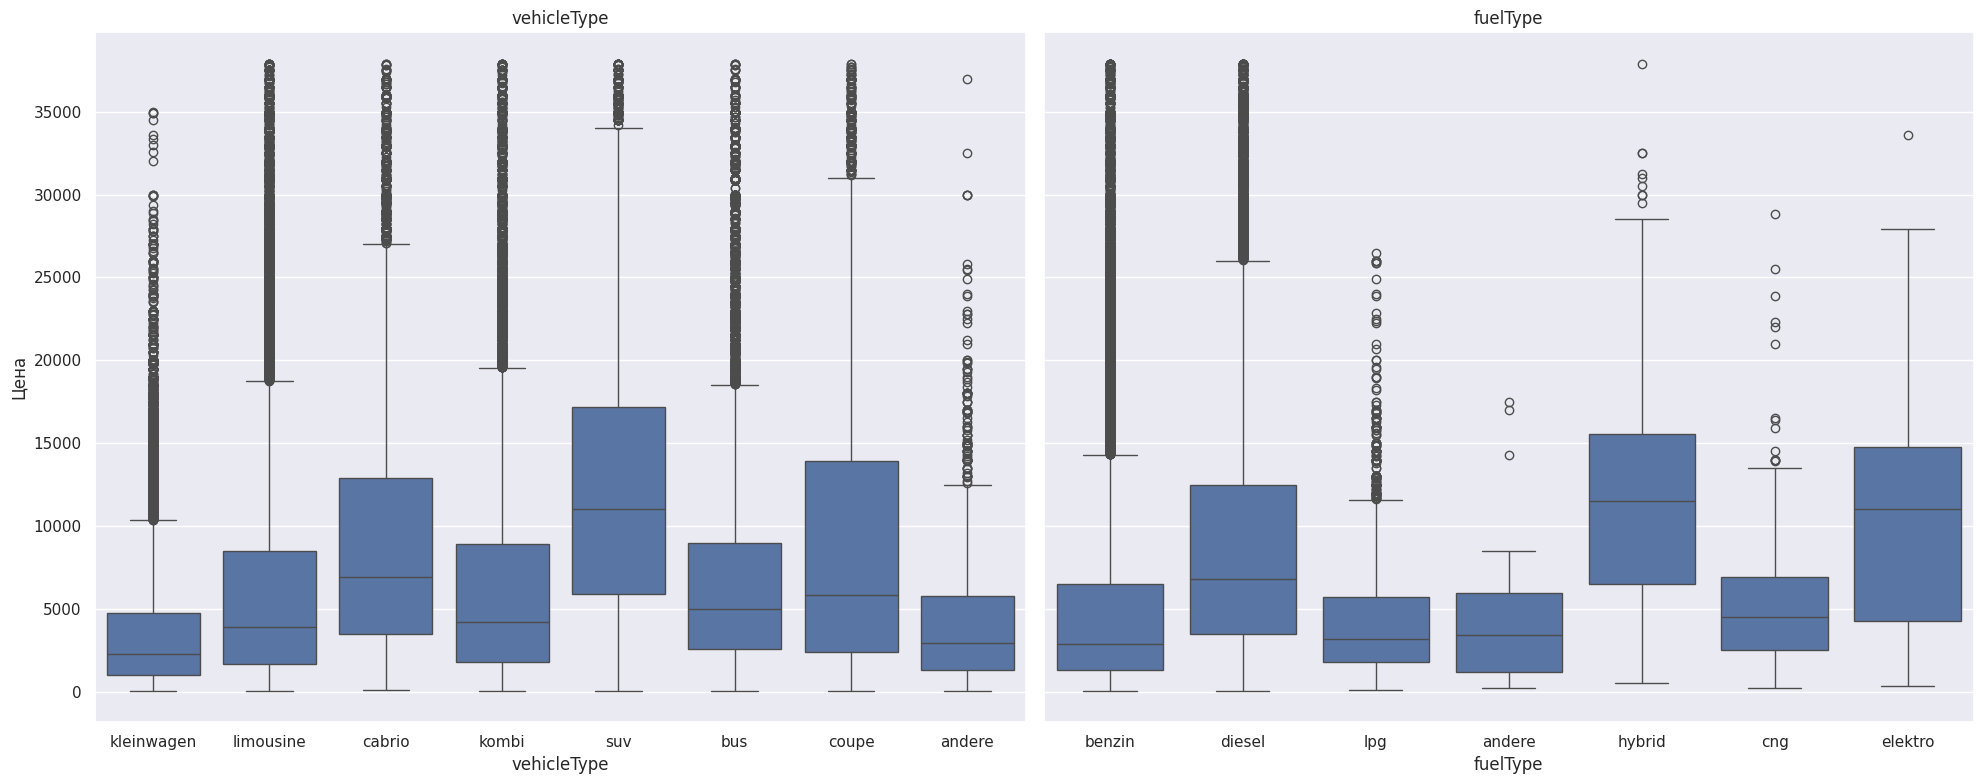

In [142]:
plt.rcParams['figure.figsize'] = (20, 8)

fig, axes = plt.subplots(1, 2, sharey=True)
columns = ['vehicleType', 'fuelType']
titles = [
    'vehicleType',
    'fuelType'


]
for ax, col, title in zip(axes, columns, titles):
    sns.boxplot(x=col, y="price", data=data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(col)
    if ax == axes[0]:
        ax.set_ylabel("Цена")

plt.tight_layout()
plt.show()

In [143]:
data['fuelType_encoded'] = data['fuelType'].astype('category').cat.codes
correlation = data[['fuelType_encoded', 'price']].corr().iloc[0, 1]
print("Корреляция типа топлива с ценой:", correlation)

Корреляция типа топлива с ценой: 0.23841546295012506


In [144]:
data['vehicleType_encoded'] = data['vehicleType'].astype('category').cat.codes
correlation = data[['vehicleType_encoded', 'price']].corr().iloc[0, 1]
print("Корреляция типа топлива с ценой:", correlation)

Корреляция типа топлива с ценой: 0.009404542320853592


На удивление, вид транспорта не влияет на транспорт, а вид топлива влияет

In [145]:
categorical = ['kilometer', 'brand', 'fuelType']
numeric = ['powerPS', 'log_age']
other = ['gearbox', 'notRepairedDamage']

# YOUR CODE (EDA):

In [146]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']
y

,log_price
0,7.313887
1,8.188967
2,6.478510
3,7.696667
4,7.601402
...,...
241185,8.974745
241186,8.071219
241187,7.090077
241188,9.127067


In [147]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [148]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [149]:
y_val = y_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [150]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
lambdas = np.logspace(-3, 1, 50)

methods = ['full', 'stochastic', 'momentum', 'adam']
results = {
    'method': [],
    'lambda': [],
    'val_loss': [],
    'train_loss': [],
    'test_loss': [],
    'val_r2': [],
    'train_r2': [],
    'test_r2': [],
    'iterations': []
}
for method in methods:
    for lam in lambdas:
        results['method'].append(method)
        results['lambda'].append(lam)

        regression_config = {
            'descent_name': method,
            'kwargs': {'dimension': x_val.shape[1], 'lambda_': lam}
        }

        reg = LinearRegression(regression_config)
        model = reg.fit(x_val, y_val)


        results['val_loss'].append(root_mean_squared_error(y_val, model.predict(x_val)))
        results['train_loss'].append(root_mean_squared_error(y_train, model.predict(x_train)))
        results['test_loss'].append(root_mean_squared_error(y_test, model.predict(x_test)))

        results['val_r2'].append(r2_score(y_val, model.predict(x_val)))
        results['train_r2'].append(r2_score(y_train, model.predict(x_train)))
        results['test_r2'].append(r2_score(y_test, model.predict(x_test)))


        results['iterations'].append(len(model.loss_history))


results_df = pd.DataFrame(results)


best_results = results_df.loc[results_df.groupby('method')['val_loss'].idxmin()]

print(best_results)

         method    lambda  val_loss  train_loss  test_loss    val_r2  \
185        adam  0.719686  0.535396    0.536415   0.545483  0.762030   
42         full  2.682696  0.552253    0.552067   0.560711  0.746809   
137    momentum  1.048113  0.541237    0.541079   0.550258  0.756809   
86   stochastic  0.868511  0.573598    0.573125   0.581144  0.726859   

     train_r2   test_r2  iterations  
185  0.758500  0.750555          95  
42   0.744202  0.736433          81  
137  0.754283  0.746168         107  
86   0.724315  0.716873         256  


In [151]:
best_results

,method,lambda,val_loss,train_loss,test_loss,val_r2,train_r2,test_r2,iterations
185,adam,0.719686,0.535396,0.536415,0.545483,0.762030,0.758500,0.750555,95
42,full,2.682696,0.552253,0.552067,0.560711,0.746809,0.744202,0.736433,81
137,momentum,1.048113,0.541237,0.541079,0.550258,0.756809,0.754283,0.746168,107
86,stochastic,0.868511,0.573598,0.573125,0.581144,0.726859,0.724315,0.716873,256


In [152]:
method_lambda_dict = dict(zip(best_results['method'], best_results['lambda']))

In [153]:
method_lambda_dict

{'adam': 0.7196856730011514,
 'full': 2.6826957952797246,
 'momentum': 1.0481131341546852,
 'stochastic': 0.868511373751352}

### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [154]:
loss_histories = []

for _, row in best_results.iterrows():
    method = row['method']
    best_lambda = row['lambda']
    regression_config = {
        'descent_name': method,
        'kwargs': {'dimension': x_val.shape[1], 'lambda_': best_lambda}
    }
    regression = LinearRegression(regression_config)
    trained_model = regression.fit(x_val, y_val)
    loss_history = [trained_model.loss_history[-1]] * 301
    loss_history[:len(trained_model.loss_history)] = trained_model.loss_history
    loss_histories.append({'method': method, 'loss_history': loss_history})

loss_histories_df = pd.DataFrame(loss_histories)
print(loss_histories_df)


       method                                       loss_history
0        adam  [37.06181932488051, 15.408236358644656, 5.4606...
1        full  [45.300578469243376, 1965.7762883825983, 61699...
2    momentum  [37.27010223526266, 145.0005307656609, 23.5502...
3  stochastic  [41.201753164198415, 106.16929163853577, 103.6...


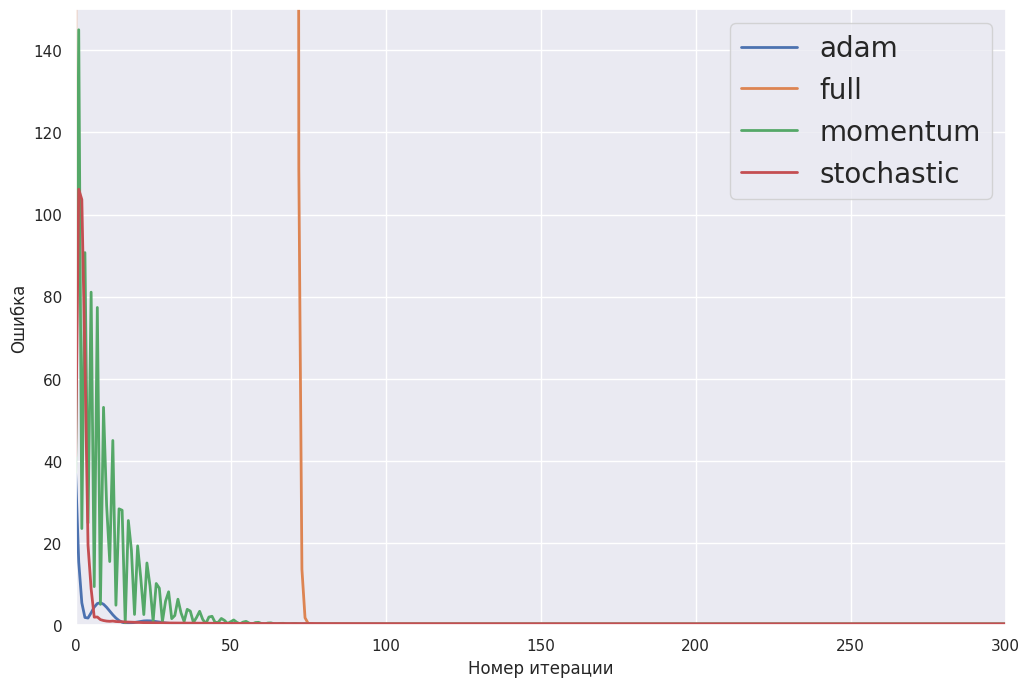

In [155]:
plt.figure(figsize=(12, 8))
plt.axis([0, 300, 0, 150])
plt.xlabel("Номер итерации")
plt.ylabel("Ошибка")
for _, row in loss_histories_df.iterrows():
    method = row['method']
    loss_history = row['loss_history']
    plt.plot(range(301), loss_history, label=method, linewidth=2)
plt.legend(fontsize=20)
plt.show()


`### ваше решение тут ###`

Метод full:

R2 довльно хорошая, что может говорить о хорошей модели или то, что модель переобучена. Количество итераций: 81( довольно быстро)

Метод stochastic:

Стохастический градиентный спуск имеет наибольшее количество итераций (199), что может быть связано с его более медленным процессом сходимости из-за случайного выбора подмножеств данных на каждой итерации. R2 стал хуже по сравнению с другими

Метод momentum:

R2 довльно хорошая, итераций стало больше, чем у метода full

Метод adam:

Довольно быстро сходится, хороший показатель R2, минимальные потери( на мой взгляд лучший метод из представленных)



Особенно можно заметить, что график показывает, что momentum с резкими колебаниями, что может быть связано с проблемой осцилляции

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [156]:
batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:
from time import time

results = []
for i in batch_sizes:
    config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': x_train.shape[1],
            'lambda_': 0.719686,
            'batch_size': i
        }
    }
    times, iterations, mses = [], [], []

    for j in range(10):
        reg = LinearRegression(config)
        start = time()
        model = reg.fit(x_train, y_train)
        end = time()
        times.append(end - start)
        iterations.append(len(model.loss_history))
        mses.append(float(np.sqrt(model.loss_history[-1])))
    results.append({
        'batch_size': i,
        'time': np.mean(times),
        'iterations': np.mean(iterations),
        'mse': np.mean(mses)
    })

results_df = pd.DataFrame(results)


print(results_df)



    batch_size      time  iterations       mse
0            5  1.225723       285.4  0.631152
1           15  1.301751       301.0  0.580742
2           25  1.197921       277.6  0.577851
3           35  1.066039       239.1  0.579826
4           45  0.934589       207.6  0.581154
5           55  0.988635       224.3  0.574718
6           65  0.829800       197.1  0.582262
7           75  0.806295       176.1  0.588030
8           85  0.668087       164.0  0.586433
9           95  0.788481       170.3  0.582448
10         105  0.526336       131.4  0.590300
11         115  0.717082       153.3  0.590088
12         125  0.585784       143.4  0.587962
13         135  0.628947       129.9  0.593799
14         145  0.570799       141.1  0.590894
15         155  0.579489       118.6  0.594166
16         165  0.503263       124.7  0.590776
17         175  0.498384       118.5  0.592218
18         185  0.559761       119.9  0.596247
19         195  0.475352       113.9  0.592165
20         20

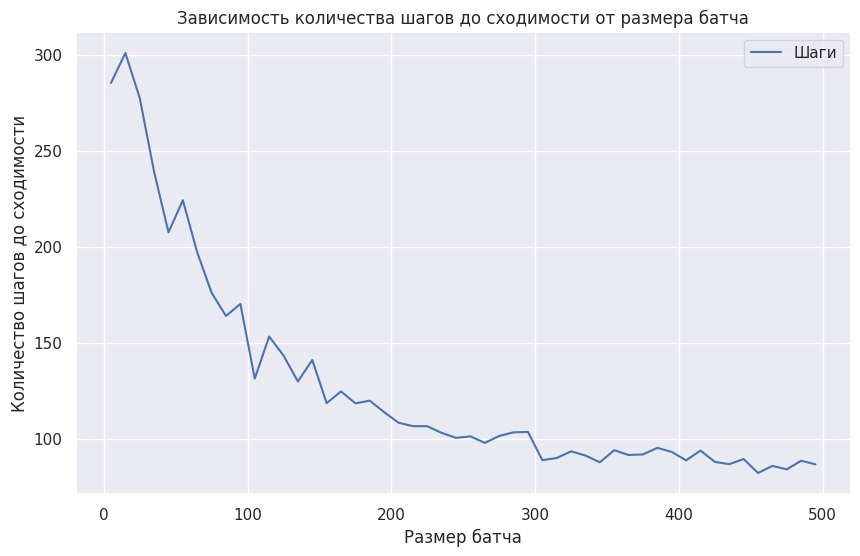

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['batch_size'], results_df['iterations'], label='Шаги')
plt.title("Зависимость количества шагов до сходимости от размера батча")
plt.xlabel("Размер батча")
plt.ylabel("Количество шагов до сходимости")
plt.grid(True)
plt.legend()
plt.show()


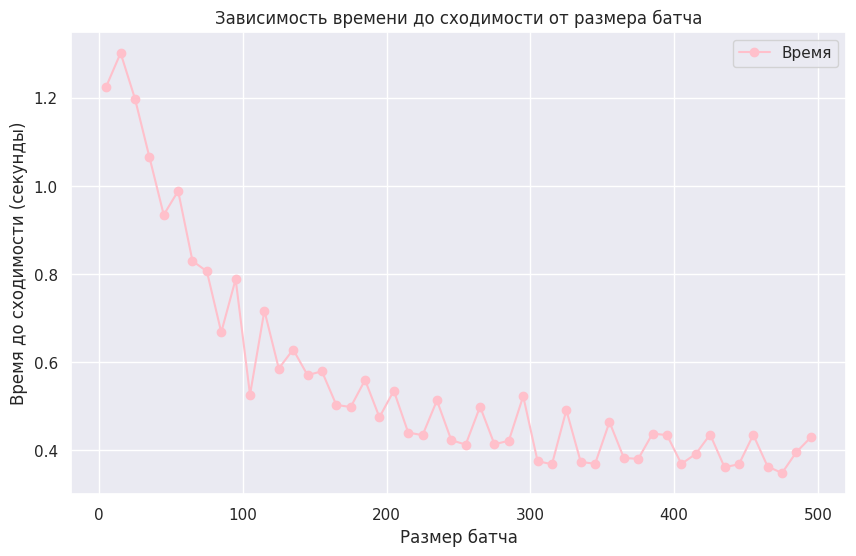

In [158]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['batch_size'], results_df['time'], marker='o', color='pink', label='Время')
plt.title("Зависимость времени до сходимости от размера батча")
plt.xlabel("Размер батча")
plt.ylabel("Время до сходимости (секунды)")
plt.grid(True)
plt.legend()
plt.show()

С увеличением размера батчей уменьшается количество итераций и время выполнения, получается удобнее использовать большие батчи(где-то 300-500)

`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/124912183/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [159]:
lambdas = [0.0001, 0.001, 0.01, 0.1, 1]
mus = np.logspace(-4, 0, 10)
methods = ['full', 'stochastic', 'momentum', 'adam']

results_new = {
    'method': [],
    'lambda': [],
    'mu': [],
    'val_loss': [],
    'train_loss': [],
    'test_loss': [],
    'val_r2': [],
    'train_r2': [],
    'test_r2': [],
    'iterations': []
}

for method in methods:
    for lam in lambdas:
        for mu in mus:
            regression_config = {
                'descent_name': method,
                'regularized': True,
                'kwargs': {
                    'dimension': x_val.shape[1],
                    'lambda_': lam,
                    'mu': mu
                }
            }


            reg = LinearRegression(regression_config)


            model = reg.fit(x_val, y_val)

            val_loss = np.sqrt(mean_squared_error(y_val, model.predict(x_val)))


            results_new['method'].append(method)
            results_new['lambda'].append(lam)
            results_new['mu'].append(mu)
            results_new['val_loss'].append(val_loss)
            results_new['train_loss'].append(np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
            results_new['test_loss'].append(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
            results_new['val_r2'].append(r2_score(y_val, model.predict(x_val)))
            results_new['train_r2'].append(r2_score(y_train, model.predict(x_train)))
            results_new['test_r2'].append(r2_score(y_test, model.predict(x_test)))
            results_new['iterations'].append(len(model.loss_history))


results_new = pd.DataFrame(results_new)
new_best_results = results_new.loc[results_new.groupby(['method', 'mu'])['val_loss'].idxmin()]

print(new_best_results)



         method  lambda        mu  val_loss  train_loss  test_loss    val_r2  \
190        adam     1.0  0.000100  0.535833    0.536833   0.546083  0.761642   
191        adam     1.0  0.000278  0.537426    0.538531   0.547954  0.760223   
192        adam     1.0  0.000774  0.544726    0.546185   0.555586  0.753664   
193        adam     1.0  0.002154  0.563395    0.564715   0.575081  0.736490   
194        adam     1.0  0.005995  0.618443    0.619554   0.630271  0.682480   
195        adam     1.0  0.016681  0.734911    0.736121   0.747198  0.551626   
196        adam     1.0  0.046416  0.948013    0.949770   0.961361  0.253894   
197        adam     1.0  0.129155  1.314231    1.315808   1.328576 -0.433887   
198        adam     1.0  0.359381  1.951347    1.952088   1.966597 -2.161116   
199        adam     1.0  1.000000  3.129459    3.131464   3.144419 -7.130359   
40         full     1.0  0.000100  0.706151    0.706749   0.717423  0.586032   
41         full     1.0  0.000278  0.702

Получается странная лямбда, попробуем использовать уже найденную лучшую лямбду

In [160]:
lambda_dict = {
    'adam': 0.868511,
    'full': 3.237458,
    'momentum': 0.868511,
    'stochastic': 0.868511
}

print(lambda_dict)


{'adam': 0.868511, 'full': 3.237458, 'momentum': 0.868511, 'stochastic': 0.868511}


In [161]:
mus = np.logspace(-4, 0, 10)
methods = ['full', 'stochastic', 'momentum', 'adam']

results_new = {
    'method': [],
    'lambda': [],
    'mu': [],
    'val_loss': [],
    'train_loss': [],
    'test_loss': [],
    'val_r2': [],
    'train_r2': [],
    'test_r2': [],
    'iterations': []
}


for method in methods:
    for mu in mus:
        regression_config = {
            'descent_name': method,
            'regularized': True,
            'kwargs': {
                'dimension': x_val.shape[1],
                'lambda_': method_lambda_dict[method],
                'mu': mu
            }
        }


        reg = LinearRegression(regression_config)


        model = reg.fit(x_val, y_val)

        val_loss = np.sqrt(mean_squared_error(y_val, model.predict(x_val)))


        results_new['method'].append(method)
        results_new['lambda'].append(method_lambda_dict[method])
        results_new['mu'].append(mu)
        results_new['val_loss'].append(val_loss)
        results_new['train_loss'].append(np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
        results_new['test_loss'].append(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
        results_new['val_r2'].append(r2_score(y_val, model.predict(x_val)))
        results_new['train_r2'].append(r2_score(y_train, model.predict(x_train)))
        results_new['test_r2'].append(r2_score(y_test, model.predict(x_test)))
        results_new['iterations'].append(len(model.loss_history))


results_new = pd.DataFrame(results_new)
new_best_results = results_new.loc[results_new.groupby(['method', 'mu'])['val_loss'].idxmin()]

print(new_best_results)


        method    lambda        mu  val_loss  train_loss  test_loss    val_r2  \
30        adam  0.719686  0.000100  0.536388    0.537425   0.546958  0.761147   
31        adam  0.719686  0.000278  0.537819    0.538900   0.548688  0.759871   
32        adam  0.719686  0.000774  0.544502    0.546021   0.555600  0.753867   
33        adam  0.719686  0.002154  0.565314    0.566804   0.576871  0.734692   
34        adam  0.719686  0.005995  0.622453    0.623710   0.633991  0.678349   
35        adam  0.719686  0.016681  0.754392    0.755512   0.765472  0.527540   
36        adam  0.719686  0.046416  0.965811    0.967411   0.978587  0.225617   
37        adam  0.719686  0.129155  1.321311    1.322891   1.335698 -0.449378   
38        adam  0.719686  0.359381  1.963176    1.963926   1.978457 -2.199555   
39        adam  0.719686  1.000000  3.143774    3.145791   3.158747 -7.204912   
0         full  2.682696  0.000100  0.590294    0.590719   0.602065  0.710727   
1         full  2.682696  0.

In [162]:
new_best_results

,method,lambda,mu,val_loss,train_loss,test_loss,val_r2,train_r2,test_r2,iterations
30,adam,0.719686,0.000100,0.536388,0.537425,0.546958,0.761147,0.757590,0.749204,102
31,adam,0.719686,0.000278,0.537819,0.538900,0.548688,0.759871,0.756258,0.747615,99
32,adam,0.719686,0.000774,0.544502,0.546021,0.555600,0.753867,0.749774,0.741215,111
33,adam,0.719686,0.002154,0.565314,0.566804,0.576871,0.734692,0.730363,0.721022,301
34,adam,0.719686,0.005995,0.622453,0.623710,0.633991,0.678349,0.673503,0.663039,301
35,adam,0.719686,0.016681,0.754392,0.755512,0.765472,0.527540,0.520933,0.508784,301
36,adam,0.719686,0.046416,0.965811,0.967411,0.978587,0.225617,0.214519,0.197191,301
37,adam,0.719686,0.129155,1.321311,1.322891,1.335698,-0.449378,-0.468799,-0.495650,301
38,adam,0.719686,0.359381,1.963176,1.963926,1.978457,-2.199555,-2.237159,-2.281459,301
39,adam,0.719686,1.000000,3.143774,3.145791,3.158747,-7.204912,-7.305649,-7.364562,301


In [163]:
loss_histories_new = []

for _, row in new_best_results.iterrows():
    method = row['method']
    best_lambda = row['lambda']
    best_mu = row['mu']


    regression_config = {
        'descent_name': method,
        'regularized': True,
        'kwargs': {
            'dimension': x_val.shape[1],
            'lambda_': best_lambda,
            'mu': best_mu
        }
    }


    regression = LinearRegression(regression_config)
    trained_model = regression.fit(x_val, y_val)
    if hasattr(trained_model, 'loss_history'):
        loss_history_new = [trained_model.loss_history[-1]] * 301
        loss_history_new[:len(trained_model.loss_history)] = trained_model.loss_history


    loss_histories_new.append({'method': method, 'lambda': best_lambda, 'mu': best_mu, 'loss_history': loss_history})


loss_histories_df_new = pd.DataFrame(loss_histories_new)

print(loss_histories_df_new)


        method    lambda        mu  \
0         adam  0.719686  0.000100   
1         adam  0.719686  0.000278   
2         adam  0.719686  0.000774   
3         adam  0.719686  0.002154   
4         adam  0.719686  0.005995   
5         adam  0.719686  0.016681   
6         adam  0.719686  0.046416   
7         adam  0.719686  0.129155   
8         adam  0.719686  0.359381   
9         adam  0.719686  1.000000   
10        full  2.682696  0.000100   
11        full  2.682696  0.000278   
12        full  2.682696  0.000774   
13        full  2.682696  0.002154   
14        full  2.682696  0.005995   
15        full  2.682696  0.016681   
16        full  2.682696  0.046416   
17        full  2.682696  0.129155   
18        full  2.682696  0.359381   
19        full  2.682696  1.000000   
20    momentum  1.048113  0.000100   
21    momentum  1.048113  0.000278   
22    momentum  1.048113  0.000774   
23    momentum  1.048113  0.002154   
24    momentum  1.048113  0.005995   
25    moment

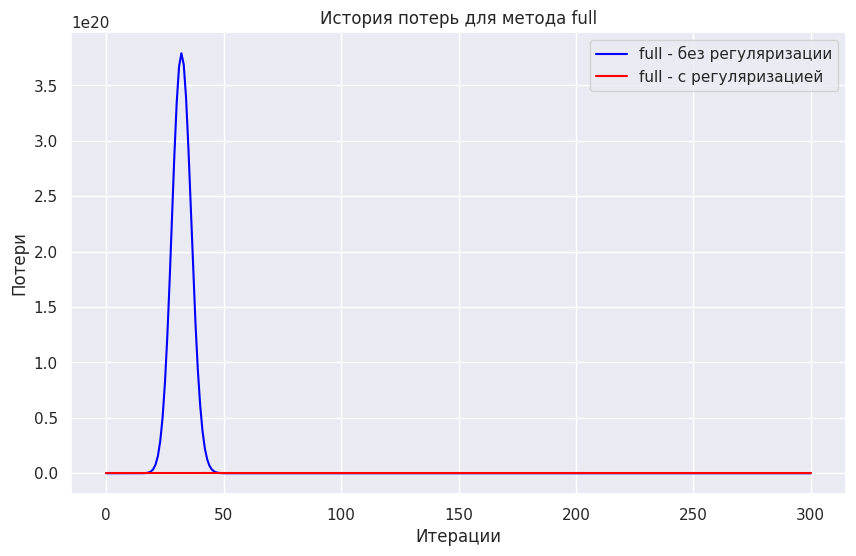

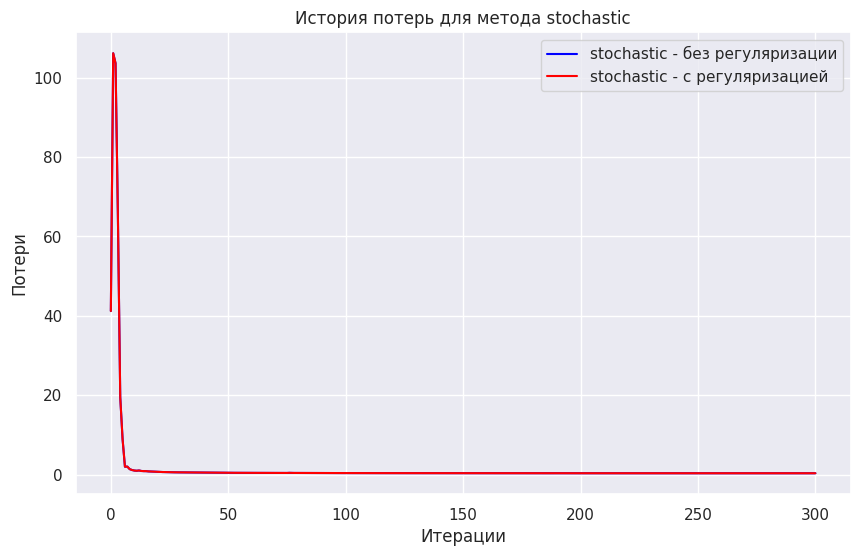

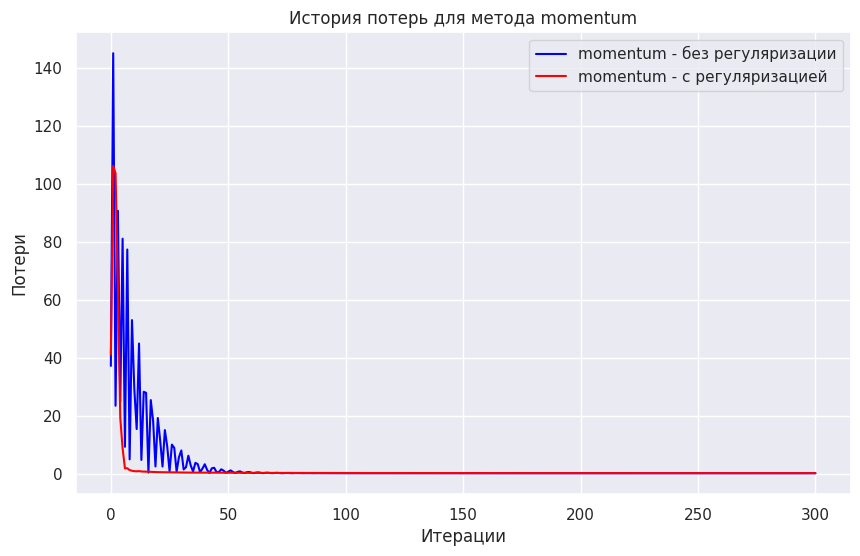

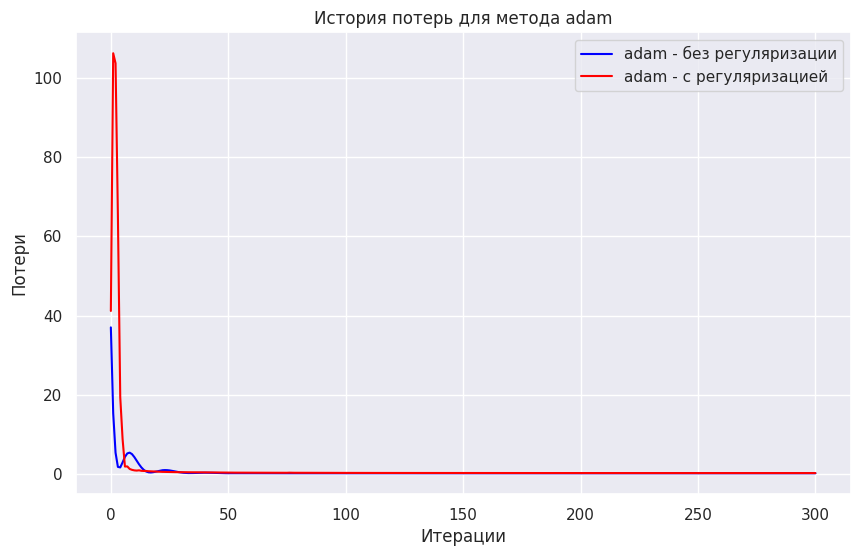

In [164]:
for method in methods:

    loss_history = loss_histories_df[loss_histories_df['method'] == method]['loss_history'].values[0]
    loss_history_new = loss_histories_df_new[loss_histories_df_new['method'] == method]['loss_history'].values[0]
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history, label=f'{method} - без регуляризации', color='blue')
    plt.plot(loss_history_new, label=f'{method} - с регуляризацией', color='red')
    plt.title(f'История потерь для метода {method}')
    plt.xlabel('Итерации')
    plt.ylabel('Потери')
    plt.legend()
    plt.show()

Полный градиент: Ошибка уменьшается быстрее, исчезают резкие скачки. Регуляризация стабилизирует модель, предотвращая переобучение.

Стокастический градиент: Нет значительных изменений. Шумные обновления от мини-батчей слабо чувствуют влияние регуляризации.

Моментум: Спуск становится более плавным, исчезают скачки. Регуляризация помогает стабилизировать веса и улучшить сходимость.

Адам: Ошибка становится более резкой. Адаптивные шаги обучения с регуляризацией могут вызвать более агрессивные изменения, если параметры подобраны не оптимально

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

$$
\frac{\partial}{\partial a} \log(\cosh(a - y)) = \frac{1}{\cosh(a - y)} \sinh(a - y)
$$
Можно записать иначе:
$$
\frac{\partial L(y, a)}{\partial a} = \tanh(a - y)
$$


Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [165]:
# YOUR CODE:

def log_cosh_loss(y_true, y_pred):
    return np.mean(np.log(np.cosh(y_pred - y_true)))

# Создание списка лямбд и методов
lambdas = np.logspace(-3, 1, 50)
methods = ['full', 'stochastic', 'momentum', 'adam']

second_results = {
    'method': [],
    'lambda': [],
    'val_loss': [],
    'train_loss': [],
    'test_loss': [],
    'val_r2': [],
    'train_r2': [],
    'test_r2': [],
    'iterations': []
}

# Процесс оптимизации для разных методов и лямбд
for method in methods:
    for lam in lambdas:
        second_results['method'].append(method)
        second_results['lambda'].append(lam)

        # Передаем сам объект LossFunction.LogCosh, а не строку
        regression_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': x_val.shape[1],
                'lambda_': lam,
                'loss_function': LossFunction.LogCosh  # Теперь передаем объект перечисления
            }
        }

        # Инициализация регрессии и обучение модели
        reg = LinearRegression(regression_config)
        model = reg.fit(x_val, y_val)

        # Вычисление потерь для валидационной, тренировочной и тестовой выборок
        val_loss = log_cosh_loss(y_val, model.predict(x_val))
        train_loss = log_cosh_loss(y_train, model.predict(x_train))
        test_loss = log_cosh_loss(y_test, model.predict(x_test))

        # Заполнение результатов
        second_results['val_loss'].append(val_loss)
        second_results['train_loss'].append(train_loss)
        second_results['test_loss'].append(test_loss)

        second_results['val_r2'].append(r2_score(y_val, model.predict(x_val)))
        second_results['train_r2'].append(r2_score(y_train, model.predict(x_train)))
        second_results['test_r2'].append(r2_score(y_test, model.predict(x_test)))

        second_results['iterations'].append(len(model.loss_history))

# Создание DataFrame с результатами
second_results = pd.DataFrame(second_results)

# Выбор лучших результатов на основе минимальных потерь на валидационной выборке
second_best_results = second_results.loc[second_results.groupby('method')['val_loss'].idxmin()]

# Вывод лучших результатов
print(second_best_results)




NameError: name 'LossFunction' is not defined

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

https://drive.google.com/file/d/10m5E1ymDu9k0EafskohN25uHo2vwhRoo/view?usp=share_link

тако найт готовили так по рецепту: (Обжарить 400 г фарша с паприкой, тмином, чесночным порошком, чили, солью и перцем, Разогреть лепешки, Выложить на лепешки фарш, сыр, салат, помидоры, лук, кукурузу, авокадо и соус)
и смотрели шрека

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

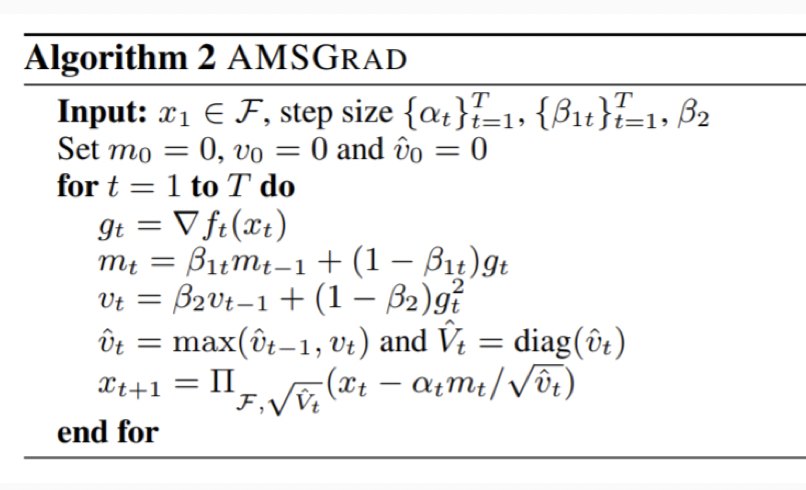

Информация отсюда: https://logic.pdmi.ras.ru/~sergey/teaching/mlspsu19/23-adaptive.pdf

In [167]:
# YOUR CODE:
lambdas = np.logspace(-3, 1, 50)

methods = ['full', 'stochastic', 'momentum', 'adam', 'amsgrad']
final_results = {
    'method': [],
    'lambda': [],
    'val_loss': [],
    'train_loss': [],
    'test_loss': [],
    'val_r2': [],
    'train_r2': [],
    'test_r2': [],
    'iterations': []
}
for method in methods:
    for lam in lambdas:
        final_results['method'].append(method)
        final_results['lambda'].append(lam)

        regression_config = {
            'descent_name': method,
            'kwargs': {'dimension': x_val.shape[1], 'lambda_': lam}
        }

        reg = LinearRegression(regression_config)
        model = reg.fit(x_val, y_val)


        final_results['val_loss'].append(root_mean_squared_error(y_val, model.predict(x_val)))
        final_results['train_loss'].append(root_mean_squared_error(y_train, model.predict(x_train)))
        final_results['test_loss'].append(root_mean_squared_error(y_test, model.predict(x_test)))

        final_results['val_r2'].append(r2_score(y_val, model.predict(x_val)))
        final_results['train_r2'].append(r2_score(y_train, model.predict(x_train)))
        final_results['test_r2'].append(r2_score(y_test, model.predict(x_test)))


        final_results['iterations'].append(len(model.loss_history))


final_results = pd.DataFrame(final_results)


final_results = final_results.loc[final_results.groupby('method')['val_loss'].idxmin()]

print(final_results)

         method    lambda  val_loss  train_loss  test_loss    val_r2  \
188        adam  1.264855  0.535463    0.536395   0.545362  0.761971   
239     amsgrad  1.526418  0.535292    0.536102   0.545265  0.762123   
42         full  2.682696  0.547611    0.548018   0.556699  0.751048   
137    momentum  1.048113  0.543912    0.543520   0.552974  0.754400   
86   stochastic  0.868511  0.568500    0.569142   0.576895  0.731693   

     train_r2   test_r2  iterations  
188  0.758519  0.750665          96  
239  0.758782  0.750754          94  
42   0.747941  0.740191          81  
137  0.752061  0.743656          98  
86   0.728134  0.720998         293  


In [170]:
loss_histories = []

for _, row in final_results.iterrows():
    method = row['method']
    best_lambda = row['lambda']
    regression_config = {
        'descent_name': method,
        'kwargs': {'dimension': x_val.shape[1], 'lambda_': best_lambda}
    }
    regression = LinearRegression(regression_config)
    trained_model = regression.fit(x_val, y_val)
    loss_history = [trained_model.loss_history[-1]] * 301
    loss_history[:len(trained_model.loss_history)] = trained_model.loss_history
    loss_histories.append({'method': method, 'loss_history': loss_history})

loss_histories_df = pd.DataFrame(loss_histories)
print(loss_histories_df)

       method                                       loss_history
0        adam  [33.82456061469674, 4.8071734470348595, 2.7274...
1     amsgrad  [44.702584015667014, 5.421367707480631, 4.6210...
2        full  [40.1536203998104, 1854.6738962025302, 58926.7...
3    momentum  [41.52688044113278, 172.62687339103798, 23.282...
4  stochastic  [36.08486671158397, 91.01559214689284, 130.301...


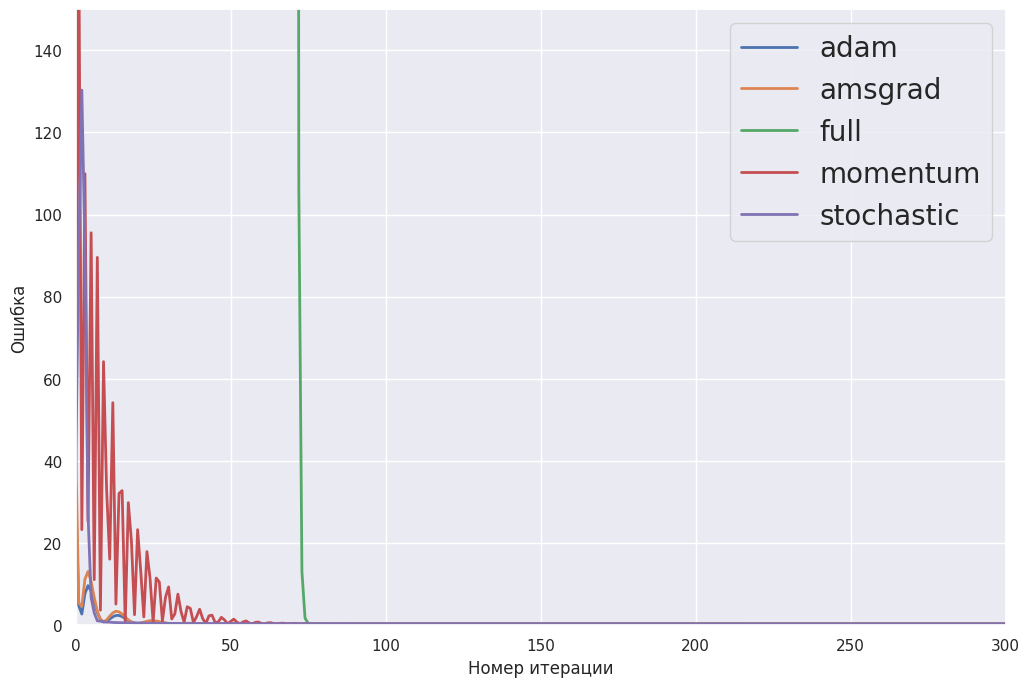

In [171]:
plt.figure(figsize=(12, 8))
plt.axis([0, 300, 0, 150])
plt.xlabel("Номер итерации")
plt.ylabel("Ошибка")
for _, row in loss_histories_df.iterrows():
    method = row['method']
    loss_history = row['loss_history']
    plt.plot(range(301), loss_history, label=method, linewidth=2)
plt.legend(fontsize=20)
plt.show()

AMSGrad улучшает Adam, стабилизируя обновления за счет использования максимального значения второй моментной оценки. Это позволяет быстрее сходиться и требовать меньше итераций. Отличие в том, что шаги обновления становятся более равномерными и предсказуемыми, что улучшает обучение и обобщение.

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: